In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

In [58]:
file = pd.read_csv('PV2.csv',sep =';')
file.columns

Index(['DATE', 'INV', 'Prod', 'Pred_self', 'Pred_neighbour', 'IRRADIANCE'], dtype='object')

In [59]:
d = file.set_index('DATE')
a = d.pivot(columns='INV',values=['Prod','Pred_self','Pred_neighbour','IRRADIANCE'])

In [60]:
b = a.swaplevel(axis=1).sort_index(by="INV", axis=1)

/home/karine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [61]:
#A faire fonction moving average +plot

# Exploration data

In [72]:
h.head()
h.describe()

,Pred_neighbour,IRRADIANCE,Pred_self,Prod
count,8640.000000,8640.000000,8640.000000,8640.000000
mean,373.338754,479.605421,374.296992,368.406352
std,244.319227,329.645665,241.501188,240.435483
min,2.456427,0.000000,22.934024,0.000000
25%,129.929324,161.175000,141.012185,132.905000
50%,391.624644,474.900000,370.849761,383.630000
75%,614.027291,782.625000,596.291686,600.372500
max,699.293329,1192.100000,896.276517,706.250000


In [73]:
h.corr()

,Pred_neighbour,IRRADIANCE,Pred_self,Prod
Pred_neighbour,1.000000,0.990373,0.990373,0.997944
IRRADIANCE,0.990373,1.000000,1.000000,0.991383
Pred_self,0.990373,1.000000,1.000000,0.991383
Prod,0.997944,0.991383,0.991383,1.000000


# Add columns residual on the data

In [76]:
h['residu_self'] = h['Prod'] -h['Pred_self']
h['residu_n'] = h['Prod'] -h['Pred_neighbour']
h.head()

/home/karine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/karine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pred_neighbour,IRRADIANCE,Pred_self,Prod,residu_self,residu_n
DATE,,,,,,
2018-06-07 16:50:00,698.107903,919.0,696.201159,700.72,4.518841,2.612097
2018-06-08 07:00:00,29.054613,35.7,49.088144,28.53,-20.558144,-0.524613
2018-06-08 07:10:00,27.335125,41.6,53.410534,29.67,-23.740534,2.334875
2018-06-08 07:20:00,35.372095,67.8,72.604874,41.21,-31.394874,5.837905
2018-06-08 07:30:00,49.241247,91.7,90.114215,58.40,-31.714215,9.158753


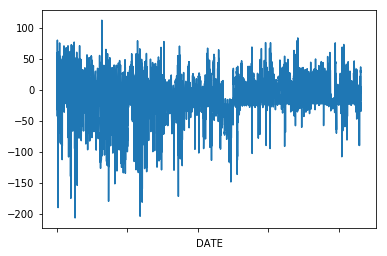

In [78]:
h['residu_self'].plot()

# To do... Wavelet decomposition

# Moving average over one day on the full data

In [62]:
h = b.loc[:,'PVT02.INV02']
h.head()
irrpd = pd.to_numeric(h.loc[:,'IRRADIANCE'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
sol_avg = irrpd.rolling(window , win_type='triang').sum()


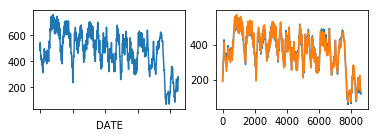

In [63]:
h = b.loc[:,'PVT03.INV02']
plt.subplot(221)
sol_avg[6*24:].plot()

plt.subplot(222)
pr = pd.to_numeric(h.loc[:,'Prod'])
pr = h.loc[:,'Prod']
window_size = 24*6
window = np.ones(window_size)/float(window_size)
prod = np.convolve(pr.values, window, 'same')
plt.plot(prod)



prev = pd.to_numeric(h.loc[:,'Pred_self'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
pred = np.convolve(prev.values, window, 'same')
plt.plot(pred)

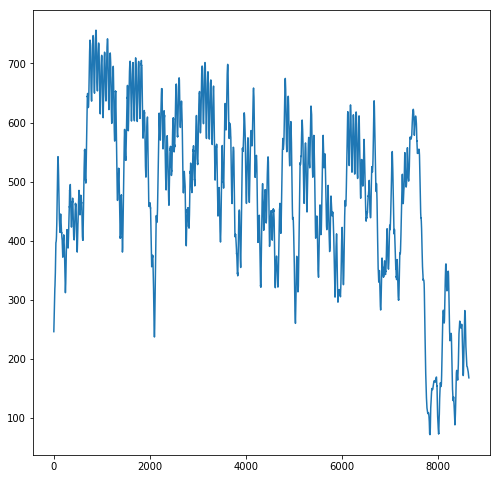

In [64]:
plt.figure(figsize=(18,18))
plt.subplot(221)
h = b.loc[:,'PVT02.INV02']
irrpd = pd.to_numeric(h.loc[:,'IRRADIANCE'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
solar_rad_avg = np.convolve(irrpd.values, window, 'same')
plt.plot(solar_rad_avg)



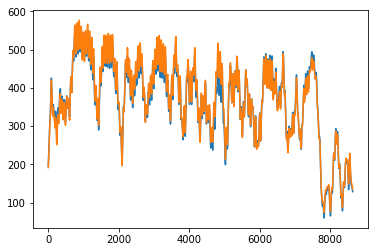

In [65]:
pr = pd.to_numeric(h.loc[:,'Prod'])
pr = h.loc[:,'Prod']
window_size = 24*6
window = np.ones(window_size)/float(window_size)
prod = np.convolve(pr.values, window, 'same')
plt.plot(prod)



prev = pd.to_numeric(h.loc[:,'Pred_self'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
pred = np.convolve(prev.values, window, 'same')
plt.plot(pred)

In [66]:
h = b.loc[:,'PVT02.INV02']
b.columns
len(b.loc[:,'PVT02.INV02']['IRRADIANCE'].values)

test = pd.to_numeric(b.loc[:,'PVT02.INV02']['IRRADIANCE']).values[:1000]
pd.DataFrame(test).head()
h.head()

,Pred_neighbour,IRRADIANCE,Pred_self,Prod
DATE,,,,
2018-06-07 16:50:00,698.107903,919.0,696.201159,700.72
2018-06-08 07:00:00,29.054613,35.7,49.088144,28.53
2018-06-08 07:10:00,27.335125,41.6,53.410534,29.67
2018-06-08 07:20:00,35.372095,67.8,72.604874,41.21
2018-06-08 07:30:00,49.241247,91.7,90.114215,58.40


## Test visualisation over few month 

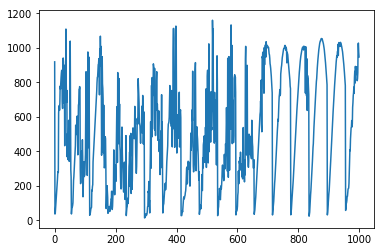

In [67]:
plt.plot(test)

## Convolution over a time period equal to a day

In [68]:
# Moving average
window_size = 24*6
window = np.ones(window_size)/float(window_size)
solar_rad_avg = np.convolve(test, window, 'same')

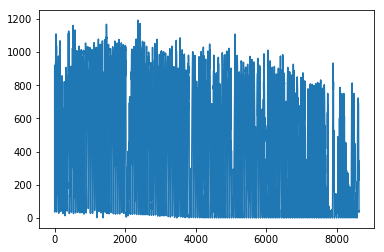

<Figure size 432x288 with 0 Axes>

In [69]:
plt.plot(list(b.loc[:,'PVT02.INV02']['IRRADIANCE'].values))
plt.show()
plt.savefig("test.png")

In [70]:
len(b.loc[:,'PVT02.INV02']['IRRADIANCE'].values)

8640